In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)


Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 100, 'lr': 0.005, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 4, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'stride1': 2, 'stride2': 2, 'crop': 200, 'size': 128, 'mean': 0.36, 'std': 0.3}


In [4]:
from Regard import ML
ml = ML(args)

import os
import torch

path = '_Regard.pt'
ml.model.load_state_dict(torch.load(path))
print('Loading file', path)


from torchvision import transforms
t = transforms.Compose([
    transforms.CenterCrop(args.crop),
    transforms.Resize(args.size),
    transforms.ToTensor(),
    #transforms.Normalize(mean=self.IMAGENET_MEAN, std=self.IMAGENET_STD),
    transforms.Normalize(mean=[args.mean]*3, std=[args.std]*3),
    ])



cuda? False
cuda? False
Found 799 sample images;  640  to train 159 to test
Loading file _Regard.pt


In [5]:
ml.dataset.dataset.classes

['blink', 'center', 'left', 'right']

# dynamical test

/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml
Time 284116.260272408


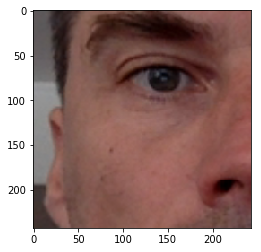

Prediction = left
Elapsed time = 366.954 ms


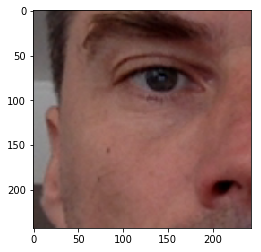

Prediction = center
Elapsed time = 381.368 ms


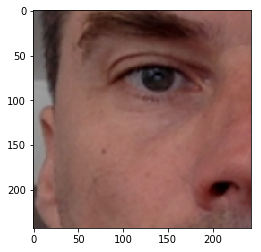

Prediction = center
Elapsed time = 355.209 ms


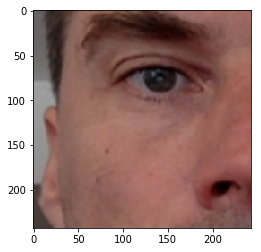

Prediction = center
Elapsed time = 371.329 ms


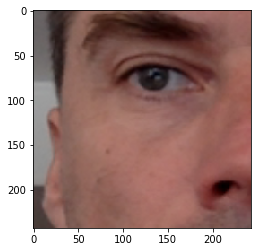

Prediction = right
Elapsed time = 361.261 ms


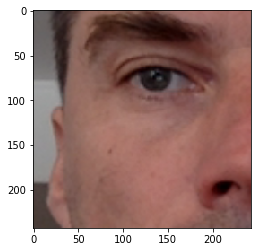

Prediction = right
Elapsed time = 374.353 ms


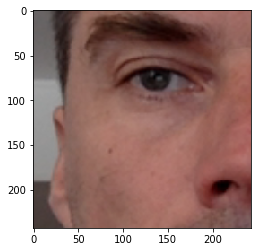

Prediction = right
Elapsed time = 353.470 ms


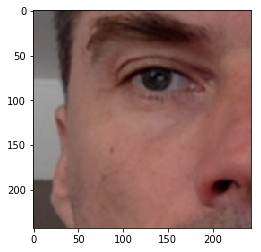

Prediction = right
Elapsed time = 361.503 ms


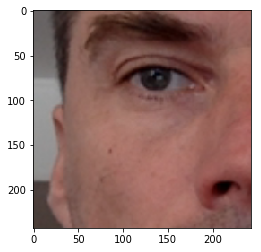

Prediction = right
Elapsed time = 381.074 ms


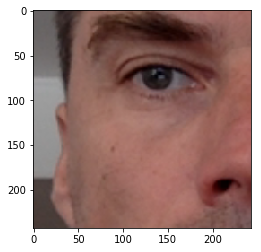

Prediction = right
Elapsed time = 373.504 ms


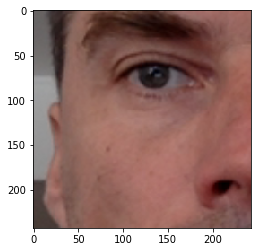

Prediction = right
Elapsed time = 352.619 ms


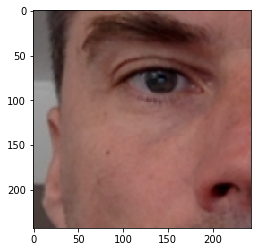

Prediction = center
Elapsed time = 371.065 ms


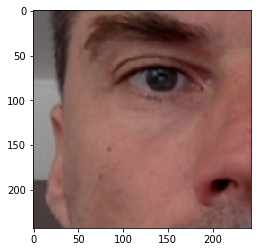

Prediction = center
Elapsed time = 370.515 ms


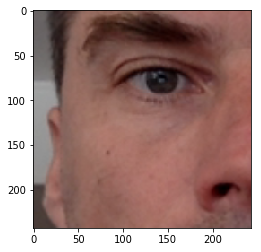

Prediction = center
Elapsed time = 368.185 ms


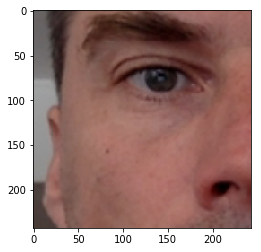

Prediction = center
Elapsed time = 424.512 ms


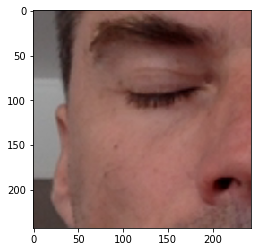

Prediction = blink
Elapsed time = 360.403 ms


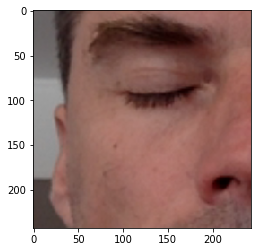

Prediction = blink
Elapsed time = 364.771 ms


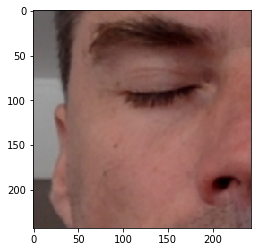

Prediction = blink
Elapsed time = 369.728 ms


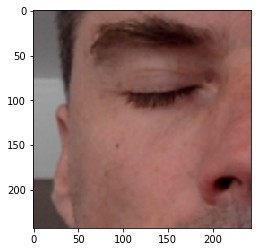

Prediction = blink
Elapsed time = 369.976 ms


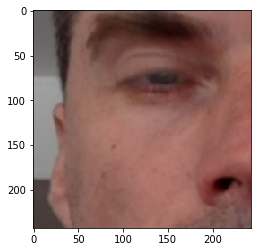

Prediction = center
Elapsed time = 367.220 ms


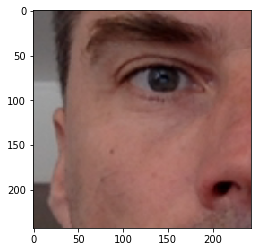

Prediction = center
Elapsed time = 380.396 ms


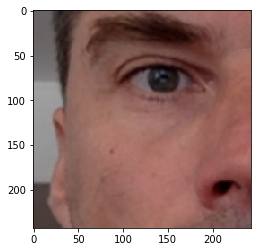

Prediction = center
Elapsed time = 352.368 ms


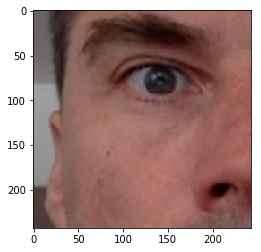

Prediction = center
Elapsed time = 372.187 ms


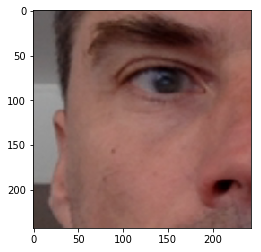

Prediction = left
Elapsed time = 379.206 ms


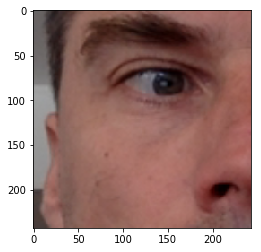

Prediction = left
Elapsed time = 346.449 ms


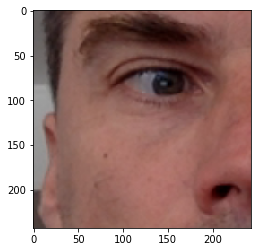

Prediction = left
Elapsed time = 366.138 ms


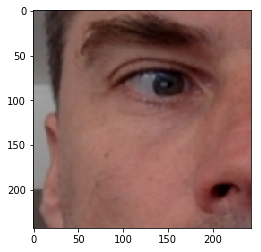

Prediction = left
Elapsed time = 365.112 ms


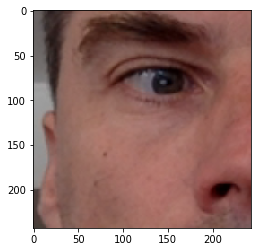

Prediction = left
Elapsed time = 370.635 ms


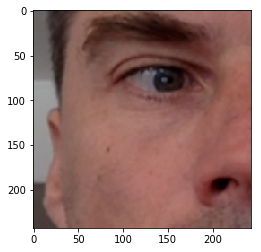

Prediction = left
Elapsed time = 351.890 ms


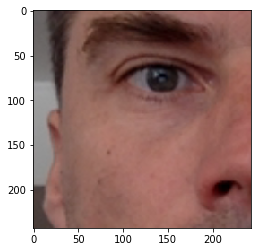

Prediction = left
Elapsed time = 367.817 ms


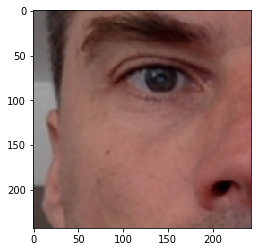

Prediction = center
Elapsed time = 402.569 ms


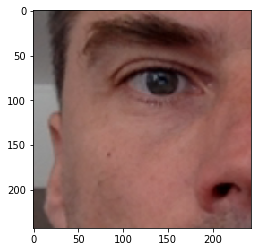

Prediction = left
Elapsed time = 397.749 ms


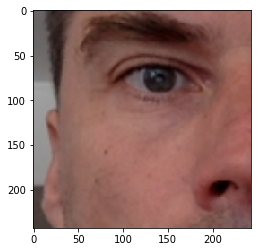

Prediction = center
Elapsed time = 359.348 ms


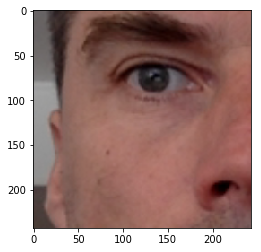

Prediction = right
Elapsed time = 362.433 ms


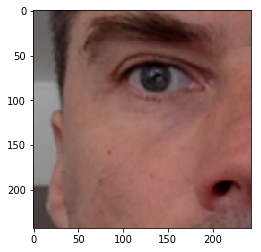

Prediction = right
Elapsed time = 369.761 ms


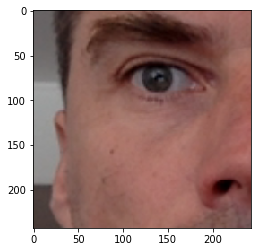

Prediction = right
Elapsed time = 352.388 ms


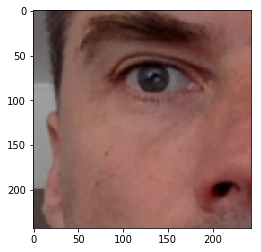

Prediction = right
Elapsed time = 381.323 ms


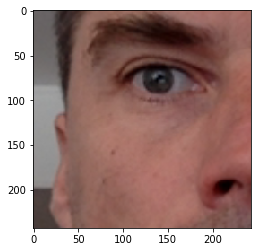

Prediction = right
Elapsed time = 362.705 ms


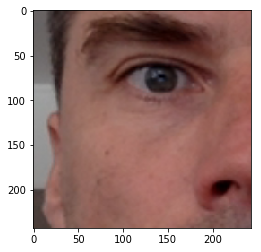

Prediction = center
Elapsed time = 349.702 ms


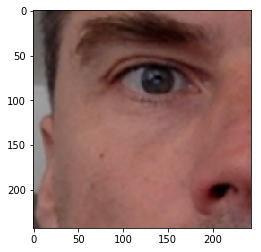

Prediction = center
Elapsed time = 351.556 ms


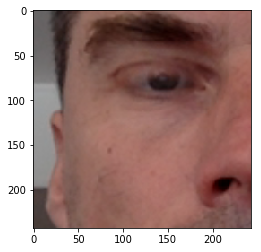

Prediction = left
Elapsed time = 370.810 ms


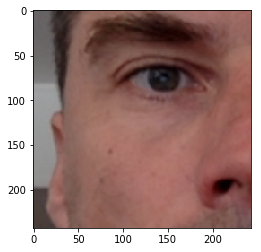

Prediction = center
Elapsed time = 348.110 ms


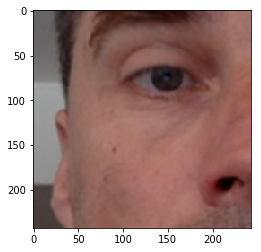

Prediction = left
Elapsed time = 379.775 ms


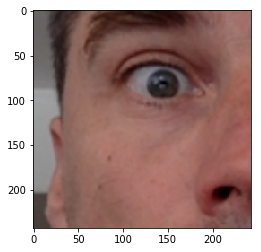

Prediction = left
Elapsed time = 365.142 ms


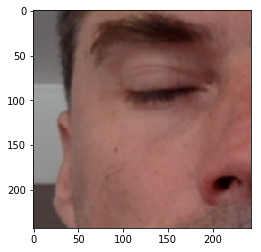

Prediction = blink
Elapsed time = 391.798 ms


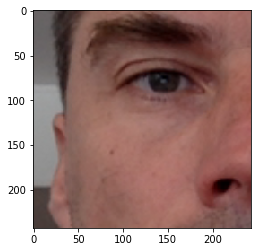

Prediction = center
Elapsed time = 362.477 ms


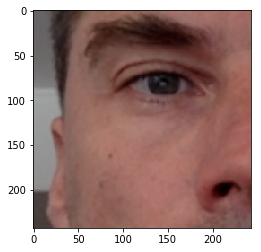

Prediction = left
Elapsed time = 431.569 ms


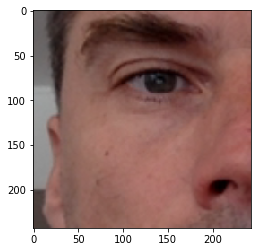

Prediction = center
Elapsed time = 400.673 ms


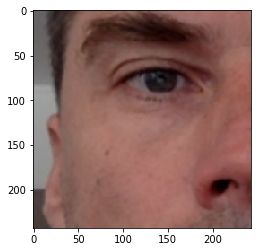

Prediction = center
Elapsed time = 403.026 ms


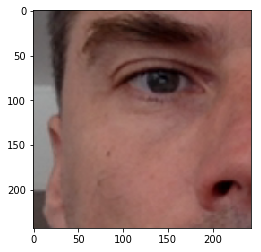

Prediction = left
Elapsed time = 373.548 ms


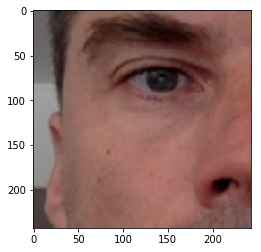

Prediction = left
Elapsed time = 369.922 ms


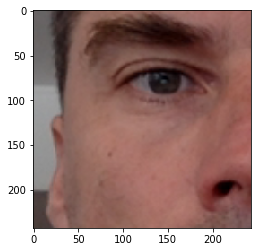

Prediction = left
Elapsed time = 367.975 ms


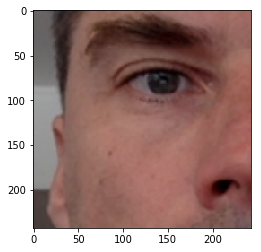

Prediction = center
Elapsed time = 349.149 ms


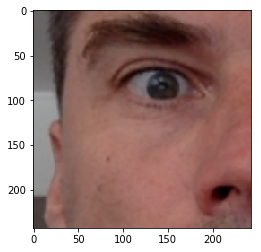

Prediction = left
Elapsed time = 350.716 ms


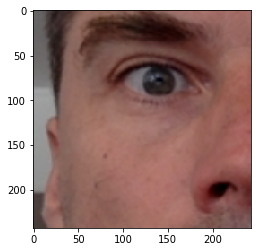

Prediction = center
Elapsed time = 374.497 ms


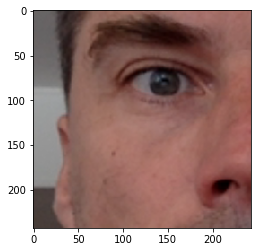

Prediction = left
Elapsed time = 366.407 ms


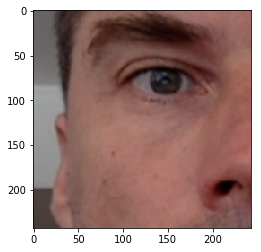

Prediction = left
Elapsed time = 361.070 ms


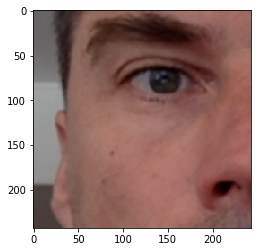

Prediction = left
Elapsed time = 368.150 ms


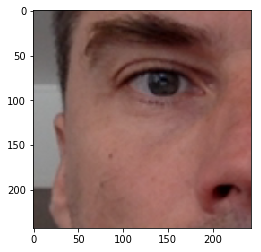

Prediction = left
Elapsed time = 385.984 ms


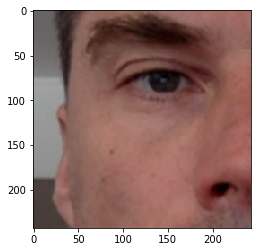

Prediction = center
Elapsed time = 385.349 ms


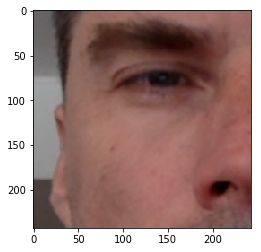

Prediction = center
Elapsed time = 353.416 ms


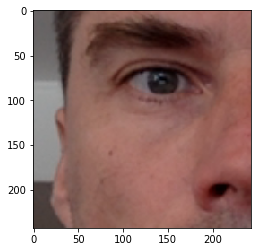

Prediction = left
Elapsed time = 372.095 ms


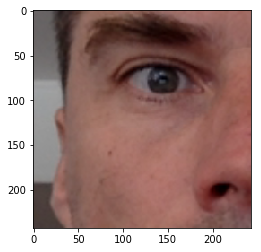

Prediction = left
Elapsed time = 418.103 ms


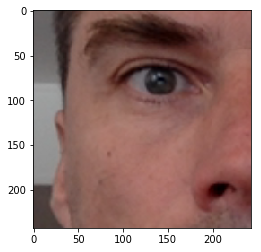

Prediction = center
Elapsed time = 378.956 ms
Capture released


In [6]:
from LeCheapEyeTracker.EyeTrackerServer import Server
#from LeCheapEyeTracker.EyeTrackerClient import Client


def classify(image, t):
    from PIL import Image


    image = Image.fromarray(image.astype('uint8'), 'RGB')
    data = t(image)
    data.unsqueeze_(0)
    output = ml.model(data)
    
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    return pred



def dyn_test(N_frame=64, startup_time=1., interframe_time=0., waiting_time=.0, display=False):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())
        H, W, three = img_face.shape
        
        for i in range(N_frame):            
            # presentation of stimulus
            time.sleep(interframe_time)

            t0 = time.time()
            if True:#try:
                frame = et.cam.grab()
                img_face, res, t0_ = et.process_frame(frame, et.clock())
                img_face = img_face[:, :, ::-1]

                pred = classify(img_face, t)
                if display:
                    plt.imshow(img_face)
                    plt.show() 
                print('Prediction =', ml.dataset.dataset.classes[pred])
                print('Elapsed time =', '%0.3f' % ((time.time()-t0)*1000), 'ms')
            #except:
            #    pass
            time.sleep(waiting_time)
            
    finally:
        et.close()
        
dyn_test(display=True)        